## Installing the packages

In [11]:
# pip install dython

In [12]:
# pip install association_metrics

In [13]:
# pip install geopy

## Importing the libraries

In [14]:
import os
import sys

import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# from dython.nominal import associations

## Reading the dataset

In [15]:
# os.chdir('C:/Users/prach/OneDrive - Singapore Management University/Documents/Term 5/Applied Machine Learning/Project')

In [16]:
cars_original_data = pd.read_csv("used_cars_data.csv", dtype={"vin": object, "back_legroom": object, "bed": object, "bed_height": object, "bed_length": object, "body_type": object, "cabin": object, "city": object, "city_fuel_economy": float, "combine_fuel_economy": float, "daysonmarket": int, "dealer_zip": object, "description": object, "engine_cylinders": object, "engine_displacement": float, "engine_type": object, "exterior_color": object, "fleet": object, "frame_damaged": object, "franchise_dealer": bool, "franchise_make": object, "front_legroom": object, "fuel_tank_volume": object, "fuel_type": object, "has_accidents": object, "height": object, "highway_fuel_economy": float, "horsepower": float, "interior_color": object, "isCab": object, "is_certified": float, "is_cpo": object, "is_new": bool, "is_oemcpo": object, "latitude": float, "length": object, "listed_date": object, "listing_color": object, "listing_id": int, "longitude": float, "main_picture_url": object, "major_options": object, "make_name": object, "maximum_seating": object, "mileage": float, "model_name": object, "owner_count": float, "power": object, "price": float, "salvage": object, "savings_amount": int, "seller_rating": float, "sp_id": float, "sp_name": object, "theft_title": object, "torque": object, "transmission": object, "transmission_display": object, "trimId": object, "trim_name": object, "vehicle_damage_category": float, "wheel_system": object, "wheel_system_display": object, "wheelbase": object, "width": object, "year": int})

In [17]:
cars = cars_original_data.copy(deep=True)

In [18]:
cars.dtypes

vin                     object
back_legroom            object
bed                     object
bed_height              object
bed_length              object
                         ...  
wheel_system            object
wheel_system_display    object
wheelbase               object
width                   object
year                     int32
Length: 66, dtype: object

## Data Wrangling

### Setting the view parameters

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)

### Studying the variables in the dataset

In [20]:
cars.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### Determining N and no. of variables

In [21]:
print(cars.shape)

(3000040, 66)


### Splitting torque column to eliminate RPM

In [22]:
new1 = cars["torque"].str.split(" ", n = 1, expand = True)

cars['torque'] = new1[0]

### Splitting engine_type to engine_type and cylinders

In [23]:
new2 = cars['engine_type'].str.extractall(r'([a-zA-Z]+)([0-9]+)').unstack()
new2.columns = ['engine_type', 'cylinders']

In [24]:
cars['engine_type'] = new2['engine_type']
cars['cylinders'] = new2['cylinders']

### Recoding 'has_accidents' into 3 categories: True, False, Unknown (where NaN == Unknown)

In [25]:
np.unique(cars['has_accidents'].values.tolist())

array(['False', 'True', 'nan'], dtype='<U32')

In [26]:
temp = []
for i in cars['has_accidents']:
    if i != 'False' or i!='True':
        temp += ['Unknown']
    else:
        temp += [i]

In [27]:
cars['has_accidents'] = temp

### Calculating AGE variable and appending to the dataset

In [28]:
cars.insert(0, "age", cars["year"].max() + 1 - cars["year"] )

### Creating make_type column and assigning values based on make_name and median price 

In [29]:
# cars['make_name'] = cars['make_name'].astype('category')

In [30]:
# top100 = cars.groupby('make_name', as_index = False)['price'].median().round(0)
# top100.nlargest(100, 'price')

In [31]:
# cars['make_name'] = cars['make_name'].astype('object')
# cars['make_type'] = np.nan

In [32]:
# make_type = {"Pagani": "Ultra_Luxury", "Koenigsegg": "Ultra_Luxury", "Bugatti": "Ultra_Luxury", "Saleen": "Luxury", "Spyker": "Luxury", "McLaren": "Luxury", "Ferrari": "Luxury", "Rolls-Royce": "Luxury", "Lamborghini": "Luxury", "DeTomaso": "Luxury", "Aston Martin": "Luxury", "Jensen": "Luxury", "Bentley": "Luxury", "Karma": "Luxury", "Shelby": "Luxury", "SRT": "Luxury", "Humber": "Luxury", "Kaiser": "Luxury", "Lotus": "Luxury", "Porsche": "Luxury", "Sunbeam": "Luxury", "AM General": "Luxury", "Allard": "Luxury", "Maserati": "Luxury", "Maybach": "Luxury", "Land Rover": "Luxury", "Austin-Healey": "Luxury", "Ariel": "Luxury", "Tesla": "Luxury", "Packard": "Luxury", "Clenet": "Luxury", "DeLorean": "Luxury", "Mercedes-Benz": "Luxury", "Jaguar": "Luxury", "RAM": "Luxury", "Cadillac": "Luxury", "Genesis": "Luxury", "Audi": "Luxury", "BMW": "Luxury", "Lincoln": "Luxury", "Volvo": "Luxury", "Hudson": "Luxury", "Alfa Romeo": "Midtier", "Freightliner": "Midtier", "Fisker": "Midtier", "Plymouth": "Midtier", "GMC": "Midtier", "Willys": "Midtier", "Lexus": "Midtier", "INFINITI": "Midtier", "Morris": "Midtier", "Acura": "Midtier", "International Harvester": "Midtier", "Ford": "Midtier", "Studebaker": "Midtier", "Jeep": "Midtier", "Chevrolet": "Budget", "Buick": "Budget", "Toyota": "Budget", "Subaru": "Budget", "Honda": "Budget", "Mazda": "Budget", "AMC": "Budget", "Dodge": "Budget", "Chrysler": "Budget", "MINI": "Budget", "Volkswagen": "Budget", "Datsun": "Budget", "VPG": "Budget", "Nissan": "Budget", "Hyundai": "Budget", "Pininfarina": "Budget", "Kia": "Budget", "Franklin": "Budget", "Mobility Ventures": "Budget", "Bricklin": "Budget", "Mitsubishi": "Budget", "Hummer": "Budget", "Triumph": "Budget", "Nash": "Budget", "Austin": "Budget", "MG": "Budget", "FIAT": "Budget", "Rover": "Budget", "Opel": "Budget", "Eagle": "Budget", "Oldsmobile": "Budget", "Hillman": "Economic", "Scion": "Economic", "Pontiac": "Economic", "smart": "Economic", "Saab": "Economic", "Mercury": "Economic", "Edsel": "Economic", "DeSoto": "Economic", "Suzuki": "Economic", "Saturn": "Economic", "Daewoo": "Economic", "Isuzu": "Economic", "Geo": "Economic"}
# cars["make_type"] = cars["make_name"].map(make_type)

In [33]:
# cars.sample(20)

### Mapping state name to city in the dataset

In [34]:
us_cs = pd.read_csv("us_cities_states.csv", encoding='cp1252')

In [35]:
state_name = us_cs.set_index('city')['state'].to_dict()

In [36]:
cars['city'] = cars['city'].str.lstrip(' ')
cars['city'] = cars['city'].str.rstrip(' ')
cars['city'] = cars['city'].str.lower()
cars['city'] = cars['city'].str.title()

In [37]:
# Mapping state name to corresponding zip value in the dataset
cars['state'] = cars['city'].map(state_name)

In [38]:
# Replace NaN (74 values resulting from Canon City) Colorado
cars['state'] = cars['state'].replace(np.nan, 'Colorado')

In [39]:
cars.head(5)

,age,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year,cylinders,state
0,3,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,Unknown,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,200,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,4,Puerto Rico
1,2,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,Unknown,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,269,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,4,Puerto Rico
2,6,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,Unknown,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,290,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,4,Puerto Rico
3,2,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,Unknown,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,332,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020,6,Puerto Rico
4,2,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,Unknown,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,269,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,4,Puerto Rico


### Dropping rows with state frequency less than 11

In [40]:
state = cars[['state']]

In [41]:
cars[state.replace(state.apply(pd.Series.value_counts)).gt(10).all(1)]

,age,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year,cylinders,state
0,3,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,Unknown,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.800000,370599.0,Flagship Chrysler,NaN,200,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,4,Puerto Rico
1,2,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,Unknown,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,269,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,4,Puerto Rico
2,6,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,Unknown,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,290,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,4,Puerto Rico
3,2,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,Unknown,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,332,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020,6,Puerto Rico
4,2,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,Unknown,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,269,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,4,Puerto Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Checking for missing values in each column

In [42]:
cars.isnull().sum()

age                              0
vin                              0
back_legroom                159269
bed                        2980472
bed_height                 2570942
bed_length                 2570942
body_type                    13543
cabin                      2936507
city                             0
city_fuel_economy           491285
combine_fuel_economy       3000040
daysonmarket                     0
dealer_zip                       0
description                  77901
engine_cylinders            100581
engine_displacement         172386
engine_type                 100581
exterior_color                  26
fleet                      1426595
frame_damaged              1426595
franchise_dealer                 0
franchise_make              572635
front_legroom               159269
fuel_tank_volume            159269
fuel_type                    82724
has_accidents                    0
height                      159269
highway_fuel_economy        491285
horsepower          

In [43]:
uniqueValues = cars.nunique()

print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
age                             98
vin                        3000000
back_legroom                   219
bed                              3
bed_height                       1
bed_length                      83
body_type                        9
cabin                            4
city                          4654
city_fuel_economy              100
combine_fuel_economy             0
daysonmarket                  1754
dealer_zip                    8237
description                2519325
engine_cylinders                39
engine_displacement             67
engine_type                      5
exterior_color               28665
fleet                            2
frame_damaged                    2
franchise_dealer                 2
franchise_make                  48
front_legroom                  101
fuel_tank_volume               182
fuel_type                        8
has_accidents                    1
height                         472
highway_fuel_ec

### Moving the dependent variable PRICE to the end of the dataframe

In [44]:
price = pd.DataFrame()
price['price'] = cars['price']
cars = cars.drop(columns = 'price')
cars['price'] = price['price']

### Dropping columns that are IDs, have unique values, are dates, or have missing value proportion over 20% 

In [45]:
cars = cars.drop(['vin', 'bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy', 'dealer_zip', 'description', 'fleet', 'frame_damaged', 'isCab', 'is_certified', 'is_cpo', 'is_oemcpo', 'listing_id', 'listed_date', 'main_picture_url', 'major_options', 'owner_count', 'salvage', 'sp_id', 'theft_title', 'trimId', 'vehicle_damage_category', 'year'], axis =1)


In [46]:
cars.isnull().sum()

age                          0
back_legroom            159269
body_type                13543
city                         0
city_fuel_economy       491285
daysonmarket                 0
engine_cylinders        100581
engine_displacement     172386
engine_type             100581
exterior_color              26
franchise_dealer             0
franchise_make          572635
front_legroom           159269
fuel_tank_volume        159269
fuel_type                82724
has_accidents                0
height                  159269
highway_fuel_economy    491285
horsepower              172386
interior_color             165
is_new                       0
latitude                     0
length                  159269
listing_color                0
longitude                    0
make_name                    0
maximum_seating         159269
mileage                 144387
model_name                   0
power                   481426
savings_amount               0
seller_rating            40872
sp_name 

In [47]:
cars.iloc[35]

age                                               2
back_legroom                                38.1 in
body_type                           SUV / Crossover
city                                       San Juan
city_fuel_economy                               NaN
daysonmarket                                    230
engine_cylinders                                 I4
engine_displacement                          2000.0
engine_type                                       I
exterior_color                 Namib Orange Premium
franchise_dealer                               True
franchise_make                           Land Rover
front_legroom                               39.1 in
fuel_tank_volume                           17.7 gal
fuel_type                                  Gasoline
has_accidents                               Unknown
height                                        68 in
highway_fuel_economy                            NaN
horsepower                                    246.0
interior_col

### Excluding string of measure from continuous variables

In [48]:
cars['back_legroom'] = cars['back_legroom'].str.replace(" in", "")

cars['front_legroom'] = cars['front_legroom'].str.replace(" in", "")

cars['fuel_tank_volume'] = cars['fuel_tank_volume'].str.replace(" gal", "")

cars['height'] = cars['height'].str.replace(" in", "")

cars['length'] = cars['length'].str.replace(" in", "")

cars['width'] = cars['width'].str.replace(" in", "")

cars['wheelbase'] = cars['wheelbase'].str.replace(" in", "")

### Replacing row values containing "--" with Nan

In [49]:
cars = cars.replace('--', np.nan, regex = True)

In [50]:
cars.isnull().sum()

age                          0
back_legroom            242727
body_type                13543
city                         0
city_fuel_economy       491285
daysonmarket                 0
engine_cylinders        100581
engine_displacement     172386
engine_type             100581
exterior_color              27
franchise_dealer             0
franchise_make          572635
front_legroom           175457
fuel_tank_volume        160677
fuel_type                82724
has_accidents                0
height                  159737
highway_fuel_economy    491285
horsepower              172386
interior_color             200
is_new                       0
latitude                     0
length                  159726
listing_color                0
longitude                    0
make_name                    0
maximum_seating         159770
mileage                 144387
model_name                   0
power                   481426
savings_amount               0
seller_rating            40872
sp_name 

### Dropping rows with any NaN values and retaining rows with full information

In [51]:
cars = cars.dropna()

In [52]:
print(cars.shape)

(1586709, 44)


### Converting continous variables to numeric data type

In [53]:
cols_to_convert = ['age', 'back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'width', 'wheelbase', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'latitude', 'longitude', 'mileage', 'price', 'savings_amount', 'seller_rating', 'torque', 'cylinders'] 
cars[cols_to_convert] = cars[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [54]:
cars.dtypes

age                       int32
back_legroom            float64
body_type                object
city                     object
city_fuel_economy       float64
daysonmarket              int32
engine_cylinders         object
engine_displacement     float64
engine_type              object
exterior_color           object
franchise_dealer           bool
franchise_make           object
front_legroom           float64
fuel_tank_volume        float64
fuel_type                object
has_accidents            object
height                  float64
highway_fuel_economy    float64
horsepower              float64
interior_color           object
is_new                     bool
latitude                float64
length                  float64
listing_color            object
longitude               float64
make_name                object
maximum_seating          object
mileage                 float64
model_name               object
power                    object
savings_amount            int32
seller_r

### Coverting categorical variables to category datatype

In [55]:
cols = cars.select_dtypes(exclude=['float', 'int'])
for col in cols:
    cars[col] = cars[col].astype('category')

In [56]:
cars.dtypes

age                        int32
back_legroom             float64
body_type               category
city                    category
city_fuel_economy        float64
daysonmarket               int32
engine_cylinders        category
engine_displacement      float64
engine_type             category
exterior_color          category
franchise_dealer        category
franchise_make          category
front_legroom            float64
fuel_tank_volume         float64
fuel_type               category
has_accidents           category
height                   float64
highway_fuel_economy     float64
horsepower               float64
interior_color          category
is_new                  category
latitude                 float64
length                   float64
listing_color           category
longitude                float64
make_name               category
maximum_seating         category
mileage                  float64
model_name              category
power                   category
savings_am

In [57]:
cars.iloc[35]

age                                                      4
back_legroom                                          38.1
body_type                                            Wagon
city                                             Bay Shore
city_fuel_economy                                     25.0
daysonmarket                                            12
engine_cylinders                                        H4
engine_displacement                                 2500.0
engine_type                                              H
exterior_color                         Crystal White Pearl
franchise_dealer                                      True
franchise_make                                   Chevrolet
front_legroom                                         42.9
fuel_tank_volume                                      18.5
fuel_type                                         Gasoline
has_accidents                                      Unknown
height                                                66

In [58]:
#print(cars['make_name'].cat.categories)

### Checking unique values across variables

In [59]:
uniqueValues = cars.nunique()

print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
age                         34
back_legroom               191
body_type                    9
city                      3156
city_fuel_economy           49
daysonmarket              1283
engine_cylinders            26
engine_displacement         56
engine_type                  5
exterior_color           17296
franchise_dealer             1
franchise_make              46
front_legroom               80
fuel_tank_volume           141
fuel_type                    6
has_accidents                1
height                     298
highway_fuel_economy        51
horsepower                 350
interior_color           27666
is_new                       2
latitude                 11499
length                     609
listing_color               15
longitude                11388
make_name                   47
maximum_seating             11
mileage                 138259
model_name                 680
power                     1274
savings_amount            7774

## Exploratory Data Analysis

### Subsettting the dataset

In [155]:
cars_subset = cars.sample(n=100000, random_state=2023)

##### Exporting the above dataset to run Cramer's V correlation in another file

In [156]:
cars_subset.to_csv('used_cars_data/cars_subset.csv', index=False)

### Describing categorical variables

In [157]:
cars.describe(include=["category"])

,body_type,city,engine_cylinders,engine_type,exterior_color,franchise_dealer,franchise_make,fuel_type,has_accidents,interior_color,is_new,listing_color,make_name,maximum_seating,model_name,power,sp_name,transmission,transmission_display,trim_name,wheel_system,wheel_system_display,state
count,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709,1586709
unique,9,3156,26,5,17296,1,46,6,1,27666,2,15,47,11,680,1274,12435,4,32,4684,5,5,51
top,SUV / Crossover,Houston,I4,I,Black,True,Chevrolet,Gasoline,Unknown,Black,True,BLACK,Ford,5 seats,F-150,"395 hp @ 5,750 RPM",Huntington Beach Chrysler Dodge Jeep Ram,A,Automatic,SE FWD,FWD,Front-Wheel Drive,Massachusetts
freq,846457,22474,819321,867355,62316,1586709,226371,1510616,1586709,472149,879442,322430,203818,1072058,77040,58446,1521,1268890,675547,42935,693572,693572,150972


##### Creating a dataframe with categorical variables

In [60]:
df1 = pd.DataFrame()

for column in cars.select_dtypes(include=['category']):
    if cars[column].nunique() < 12:
        df1[column] = cars[column]
        
display(df1)

,body_type,engine_type,franchise_dealer,fuel_type,has_accidents,is_new,maximum_seating,transmission,wheel_system,wheel_system_display
38,Sedan,I,True,Gasoline,Unknown,False,5 seats,A,FWD,Front-Wheel Drive
40,Coupe,V,True,Gasoline,Unknown,False,4 seats,A,AWD,All-Wheel Drive
41,SUV / Crossover,V,True,Gasoline,Unknown,False,8 seats,A,FWD,Front-Wheel Drive
45,SUV / Crossover,V,True,Gasoline,Unknown,False,8 seats,A,AWD,All-Wheel Drive
47,SUV / Crossover,V,True,Gasoline,Unknown,False,5 seats,A,4WD,Four-Wheel Drive
...,...,...,...,...,...,...,...,...,...,...
3000029,Coupe,V,True,Gasoline,Unknown,True,5 seats,A,RWD,Rear-Wheel Drive
3000031,Sedan,I,True,Gasoline,Unknown,False,5 seats,CVT,FWD,Front-Wheel Drive
3000034,Pickup Truck,V,True,Gasoline,Unknown,False,5 seats,A,4WD,Four-Wheel Drive
3000036,SUV / Crossover,V,True,Gasoline,Unknown,True,8 seats,A,FWD,Front-Wheel Drive


### Checking distribution of categorical variables

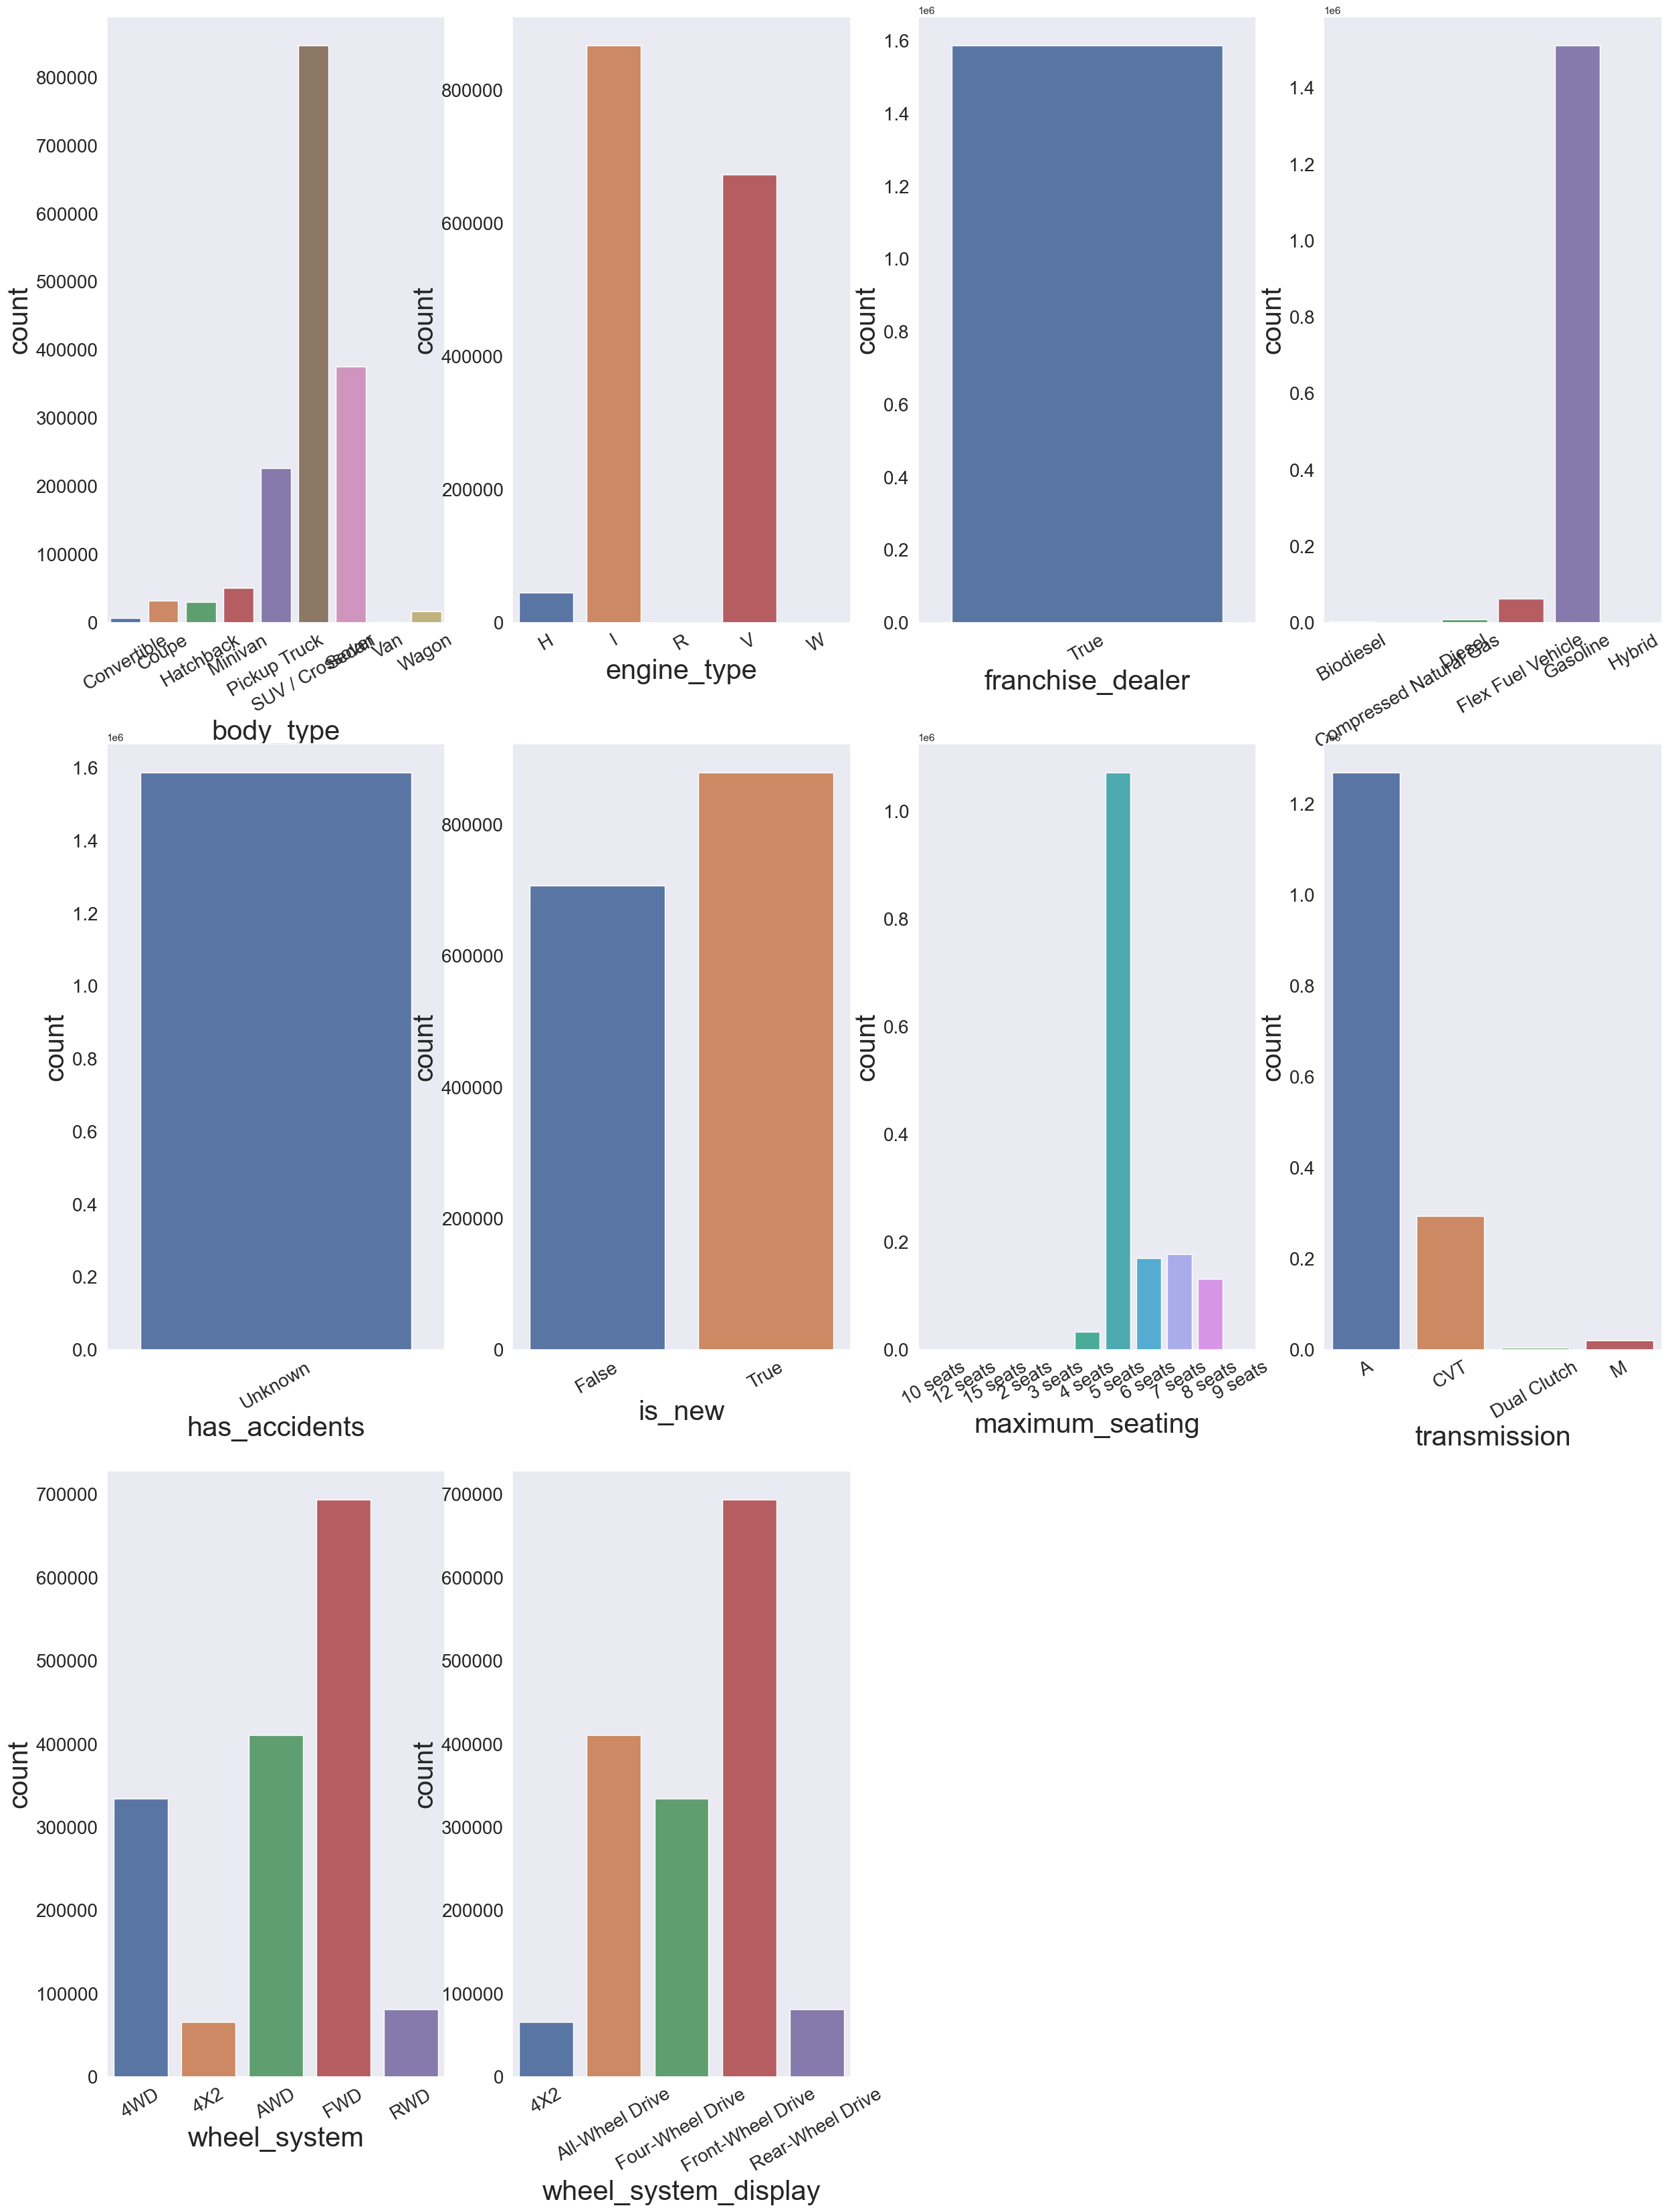

In [159]:
sns.set(style='dark',)

fig = plt.figure(figsize=(30,40))

i = 1

for column in df1.columns:
    plt.subplot(3,4,i)
    chart = sns.countplot(data = df1, x = column)
    chart.set_xlabel(chart.get_xlabel(), fontsize = 30)
    chart.set_ylabel(chart.get_ylabel(), fontsize = 30)
    chart.tick_params(axis = 'y', which = 'major', labelsize = 20)
    chart.tick_params(axis = 'x', which = 'major', labelsize = 20, rotation = 30)
    
    i+=1

### Dropping franchise_dealer variable from cars as it has only one category

In [61]:
df1 = df1.drop('franchise_dealer', axis = 1)
cars = cars.drop('franchise_dealer', axis = 1)

### Assessing outliers using boxplot

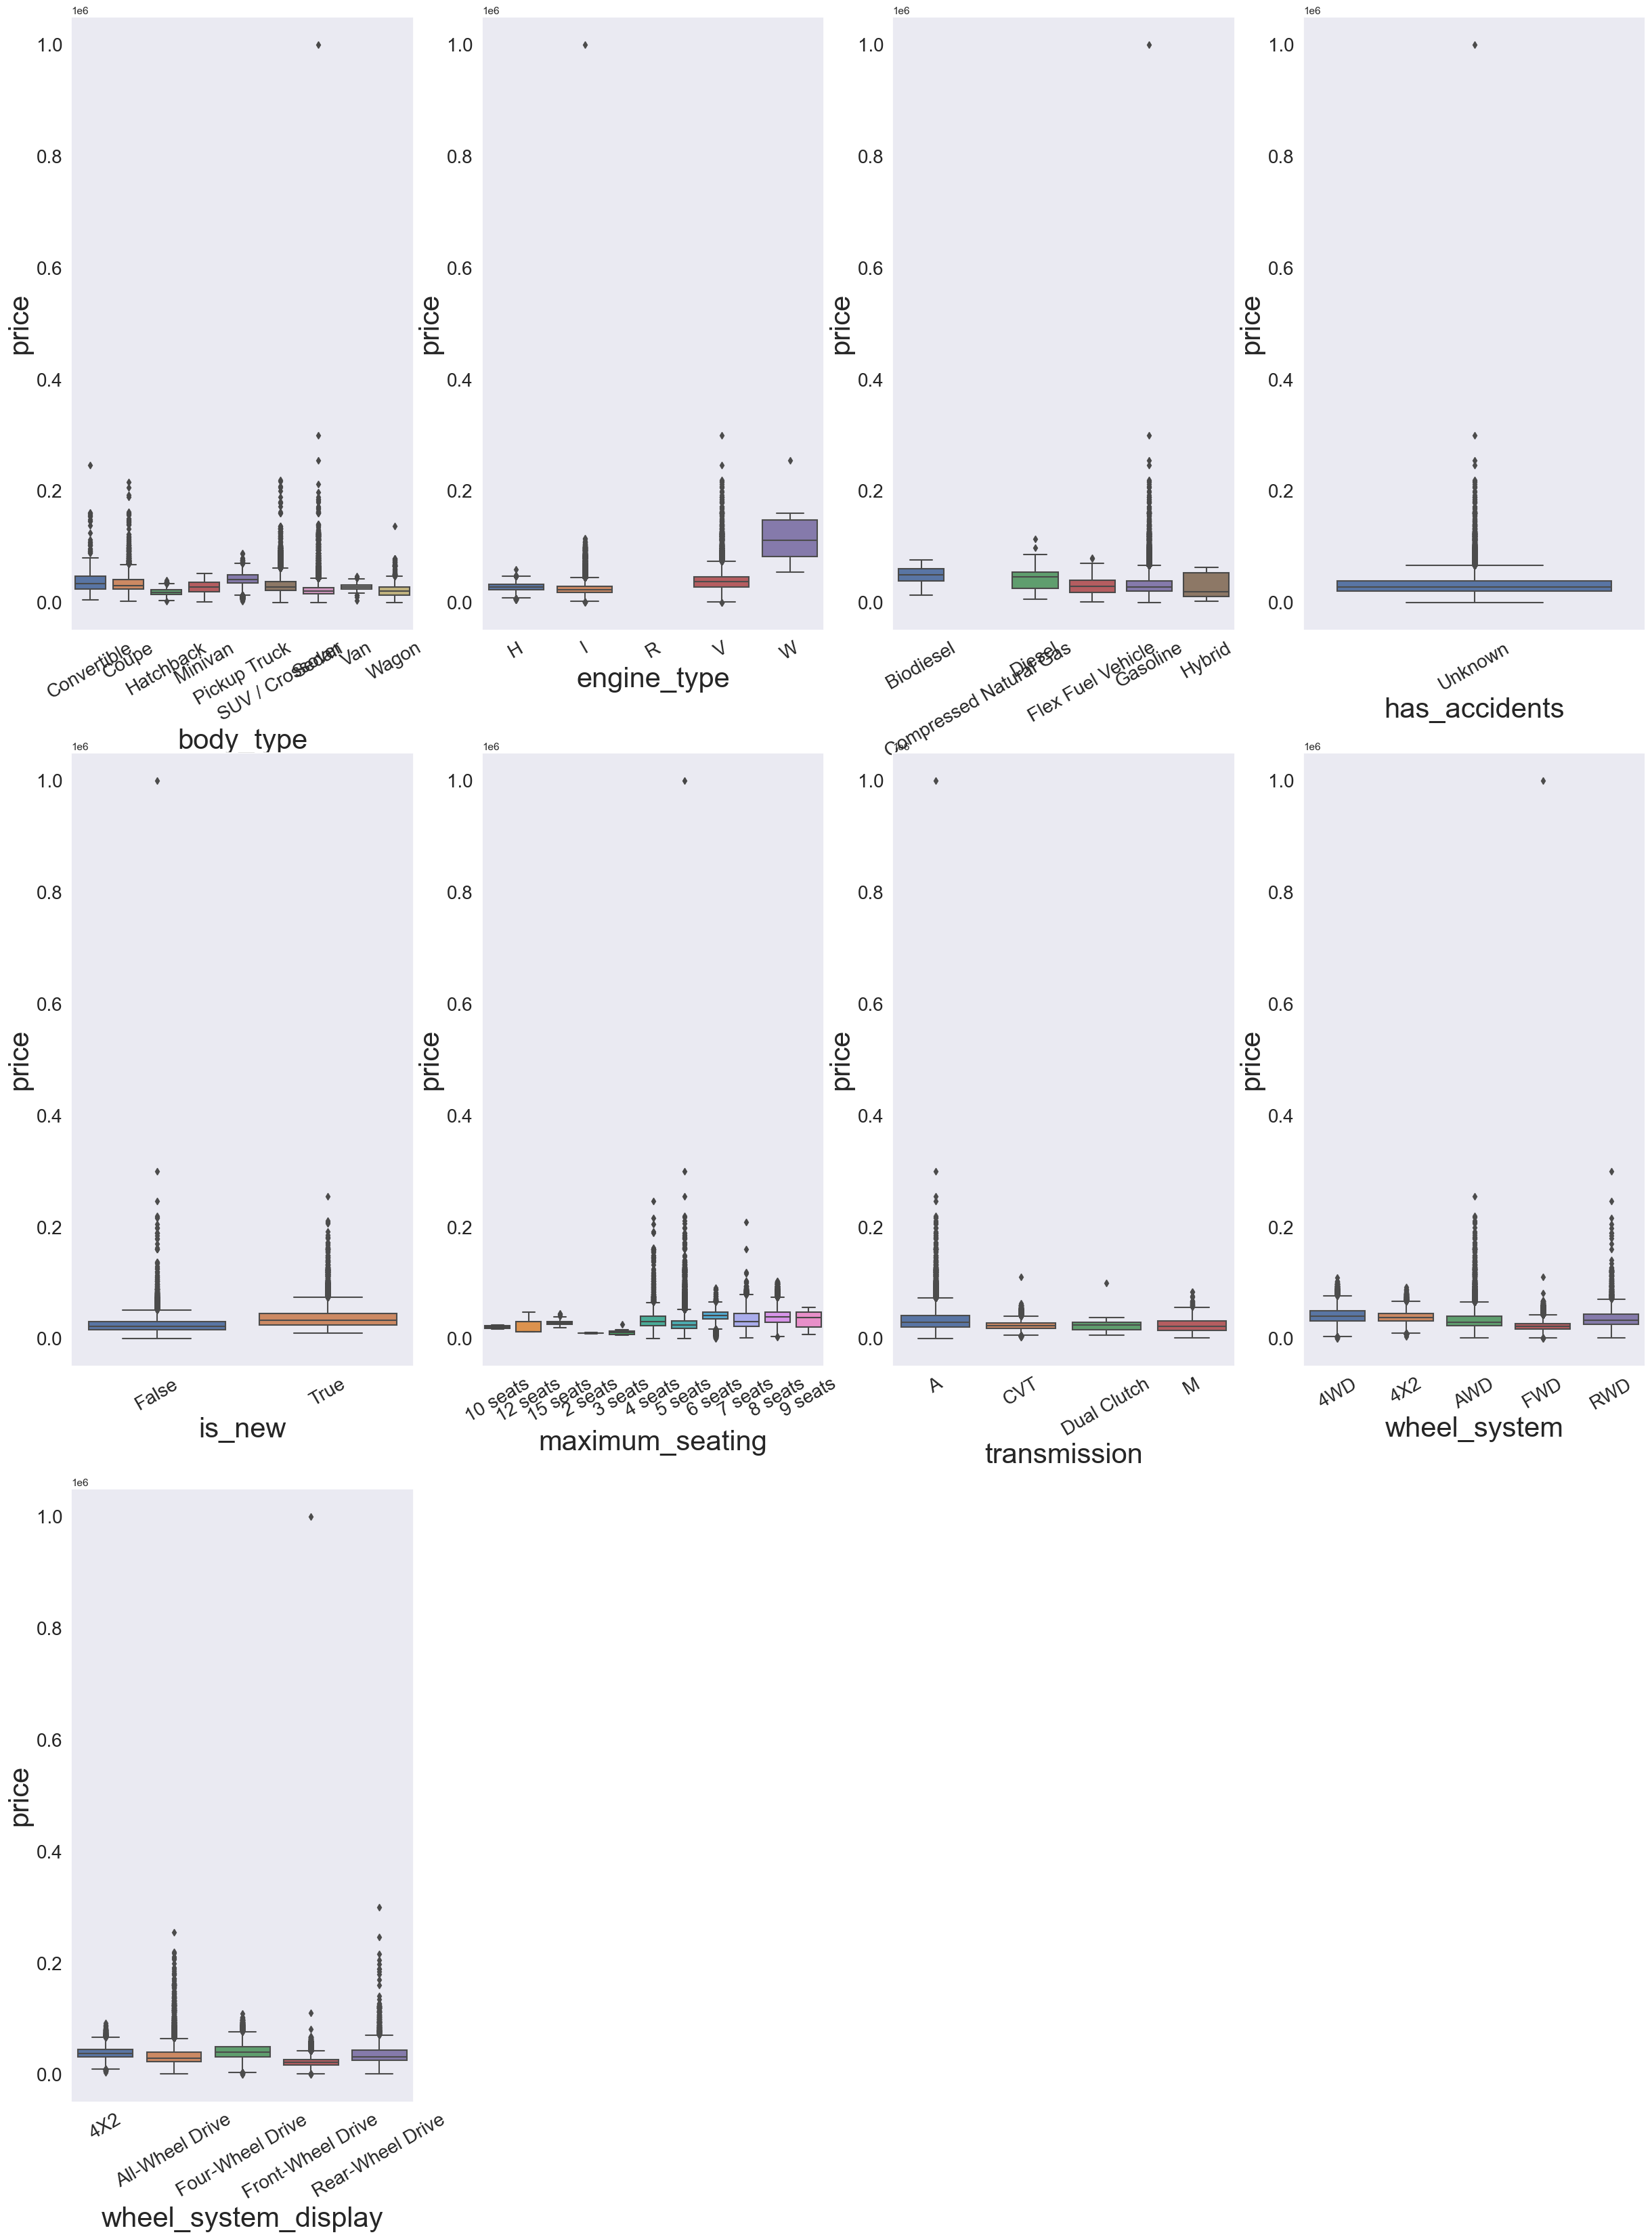

In [161]:
df1['price'] = cars_subset['price']

sns.set(style='dark',)

fig = plt.figure(figsize=(30,40))

i = 1

for column in df1.select_dtypes(include=['category', 'bool']):
    plt.subplot(3,4,i)
    chart = sns.boxplot(data = df1, x = column, y = 'price')
    chart.set_xlabel(chart.get_xlabel(), fontsize = 30)
    chart.set_ylabel(chart.get_ylabel(), fontsize = 30)
    chart.tick_params(axis = 'y', which = 'major', labelsize = 20)
    chart.tick_params(axis = 'x', which = 'major', labelsize = 20, rotation = 30)
    
    i+=1

### Checking correlations between categorical variables using Cramer's V

(please see the alternate file)

In [162]:
# col_list = list(cars_subset.select_dtypes(include=['category', 'bool']))
# print(col_list)

In [163]:
# # Convert categorical columns to object columns
# cars_object = cars_subset.apply(lambda x: x.astype("object") if x.dtype == ["category", "bool"] else x)

# # Instantiate a figure and axis object
# fig, ax = plt.subplots(figsize = (40, 15))

# # Estimate and generate Cramer's V association plot
# cramers_v = associations(cars_object[['body_type', 'city', 'engine_cylinders', 'engine_type', 'exterior_color', 'franchise_dealer', 'franchise_make', 'fuel_type', 'interior_color', 'is_new', 'listing_color', 'make_name', 'maximum_seating', 'model_name', 'power', 'sp_name', 'torque', 'transmission', 'transmission_display', 'trim_name', 'wheel_system', 'wheel_system_display']],
#                          nom_nom_assoc = 'cramer',
#                          ax = ax,
#                          cmap = "Blues")

### Descibing continuous variables

In [164]:
cars.describe(exclude=["category", 'bool'], datetime_is_numeric=True)

,age,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,longitude,mileage,savings_amount,seller_rating,torque,wheelbase,width,cylinders,price
count,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06,1.586709e+06
mean,3.396998e+00,3.816501e+01,2.160587e+01,7.572607e+01,2.887808e+03,4.217872e+01,1.823436e+01,6.581405e+01,2.871475e+01,2.477634e+02,3.699503e+01,1.928339e+02,-9.027643e+01,2.031208e+04,4.793614e+02,4.258841e+00,2.539516e+02,1.146220e+02,7.831775e+01,5.088355e+00,3.103843e+04
std,2.430819e+00,3.048013e+00,4.769217e+00,1.017148e+02,1.220455e+03,1.445091e+00,4.398606e+00,6.636855e+00,5.502965e+00,8.715523e+01,5.027747e+00,1.858170e+01,1.353242e+01,3.327822e+04,8.963196e+02,5.071999e-01,9.737541e+01,1.315817e+01,7.214157e+00,1.400256e+00,1.572416e+04
min,1.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,7.700000e+00,4.900000e+01,1.100000e+01,5.500000e+01,1.964250e+01,1.396000e+02,-1.579130e+02,0.000000e+00,0.000000e+00,1.000000e+00,5.800000e+01,8.660000e+01,6.260000e+01,2.000000e+00,4.840000e+02
25%,2.000000e+00,3.610000e+01,1.800000e+01,1.500000e+01,2.000000e+03,4.100000e+01,1.480000e+01,5.850000e+01,2.500000e+01,1.750000e+02,3.345940e+01,1.820000e+02,-9.684020e+01,5.000000e+00,0.000000e+00,4.000000e+00,1.760000e+02,1.063000e+02,7.260000e+01,4.000000e+00,2.040300e+04
50%,2.000000e+00,3.830000e+01,2.100000e+01,3.600000e+01,2.500000e+03,4.180000e+01,1.790000e+01,6.610000e+01,2.800000e+01,2.480000e+02,3.797350e+01,1.898000e+02,-8.711410e+01,2.400000e+01,0.000000e+00,4.333333e+00,2.580000e+02,1.110000e+02,7.730000e+01,4.000000e+00,2.776500e+04
75%,5.000000e+00,3.990000e+01,2.500000e+01,8.300000e+01,3.500000e+03,4.310000e+01,2.100000e+01,6.990000e+01,3.200000e+01,3.000000e+02,4.106650e+01,2.006000e+02,-8.061120e+01,3.202000e+04,6.670000e+02,4.593750e+00,2.800000e+02,1.181000e+02,8.250000e+01,6.000000e+00,3.915500e+04
max,3.500000e+01,5.980000e+01,7.400000e+01,2.688000e+03,8.100000e+03,5.250000e+01,4.200000e+01,1.086000e+02,7.500000e+01,8.080000e+02,6.120310e+01,2.661000e+02,-6.722670e+01,4.290461e+06,7.459500e+04,5.000000e+00,8.110000e+02,1.646000e+02,9.860000e+01,1.200000e+01,2.698500e+06


##### Creating a dataframe with continuous variables

In [165]:
df2 = pd.DataFrame()

for column in cars_subset.select_dtypes(exclude=['category', 'bool']):
    df2[column] = cars[column]
        
display(df2)

,age,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,longitude,mileage,savings_amount,seller_rating,torque,wheelbase,width,cylinders,price
38,4,38.1,27.0,55,1500.0,42.0,15.8,57.6,36.0,160.0,40.7333,193.8,-73.2587,42394.0,1749,3.447761,184,111.4,73.0,4,14639.0
40,4,27.3,18.0,36,3500.0,45.4,17.4,55.1,24.0,311.0,40.8847,184.8,-73.8317,62251.0,1861,2.800000,280,107.5,81.5,6,32000.0
41,4,38.4,18.0,27,3600.0,41.0,19.4,70.7,27.0,310.0,40.7333,204.3,-73.2587,36410.0,3500,3.447761,266,120.9,78.6,6,23723.0
45,5,36.8,15.0,27,3600.0,41.3,22.0,69.9,22.0,281.0,40.7333,203.7,-73.2587,36055.0,2416,3.447761,266,118.9,78.5,6,22422.0
47,4,38.6,18.0,24,3600.0,40.3,24.6,69.3,25.0,295.0,40.7333,189.8,-73.2587,25745.0,2254,3.447761,260,114.8,84.8,6,29424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000029,2,33.1,16.0,0,5700.0,42.0,18.5,57.7,25.0,375.0,38.2873,197.9,-122.2750,0.0,0,4.142857,410,116.0,85.4,8,45435.0
3000031,4,36.1,26.0,17,2500.0,45.0,18.0,57.9,37.0,179.0,38.2927,191.9,-122.2780,62138.0,1323,4.333333,177,109.3,72.0,4,17700.0
3000034,5,32.6,18.0,89,3500.0,42.9,21.1,70.6,23.0,278.0,39.1346,212.3,-123.2050,20009.0,2220,5.000000,265,127.4,75.2,6,40993.0
3000036,2,38.4,18.0,171,3600.0,41.0,19.4,70.7,27.0,310.0,38.1102,204.3,-122.2030,5.0,0,4.533333,266,120.9,78.6,6,36490.0


### Checking distribution of continuous variables

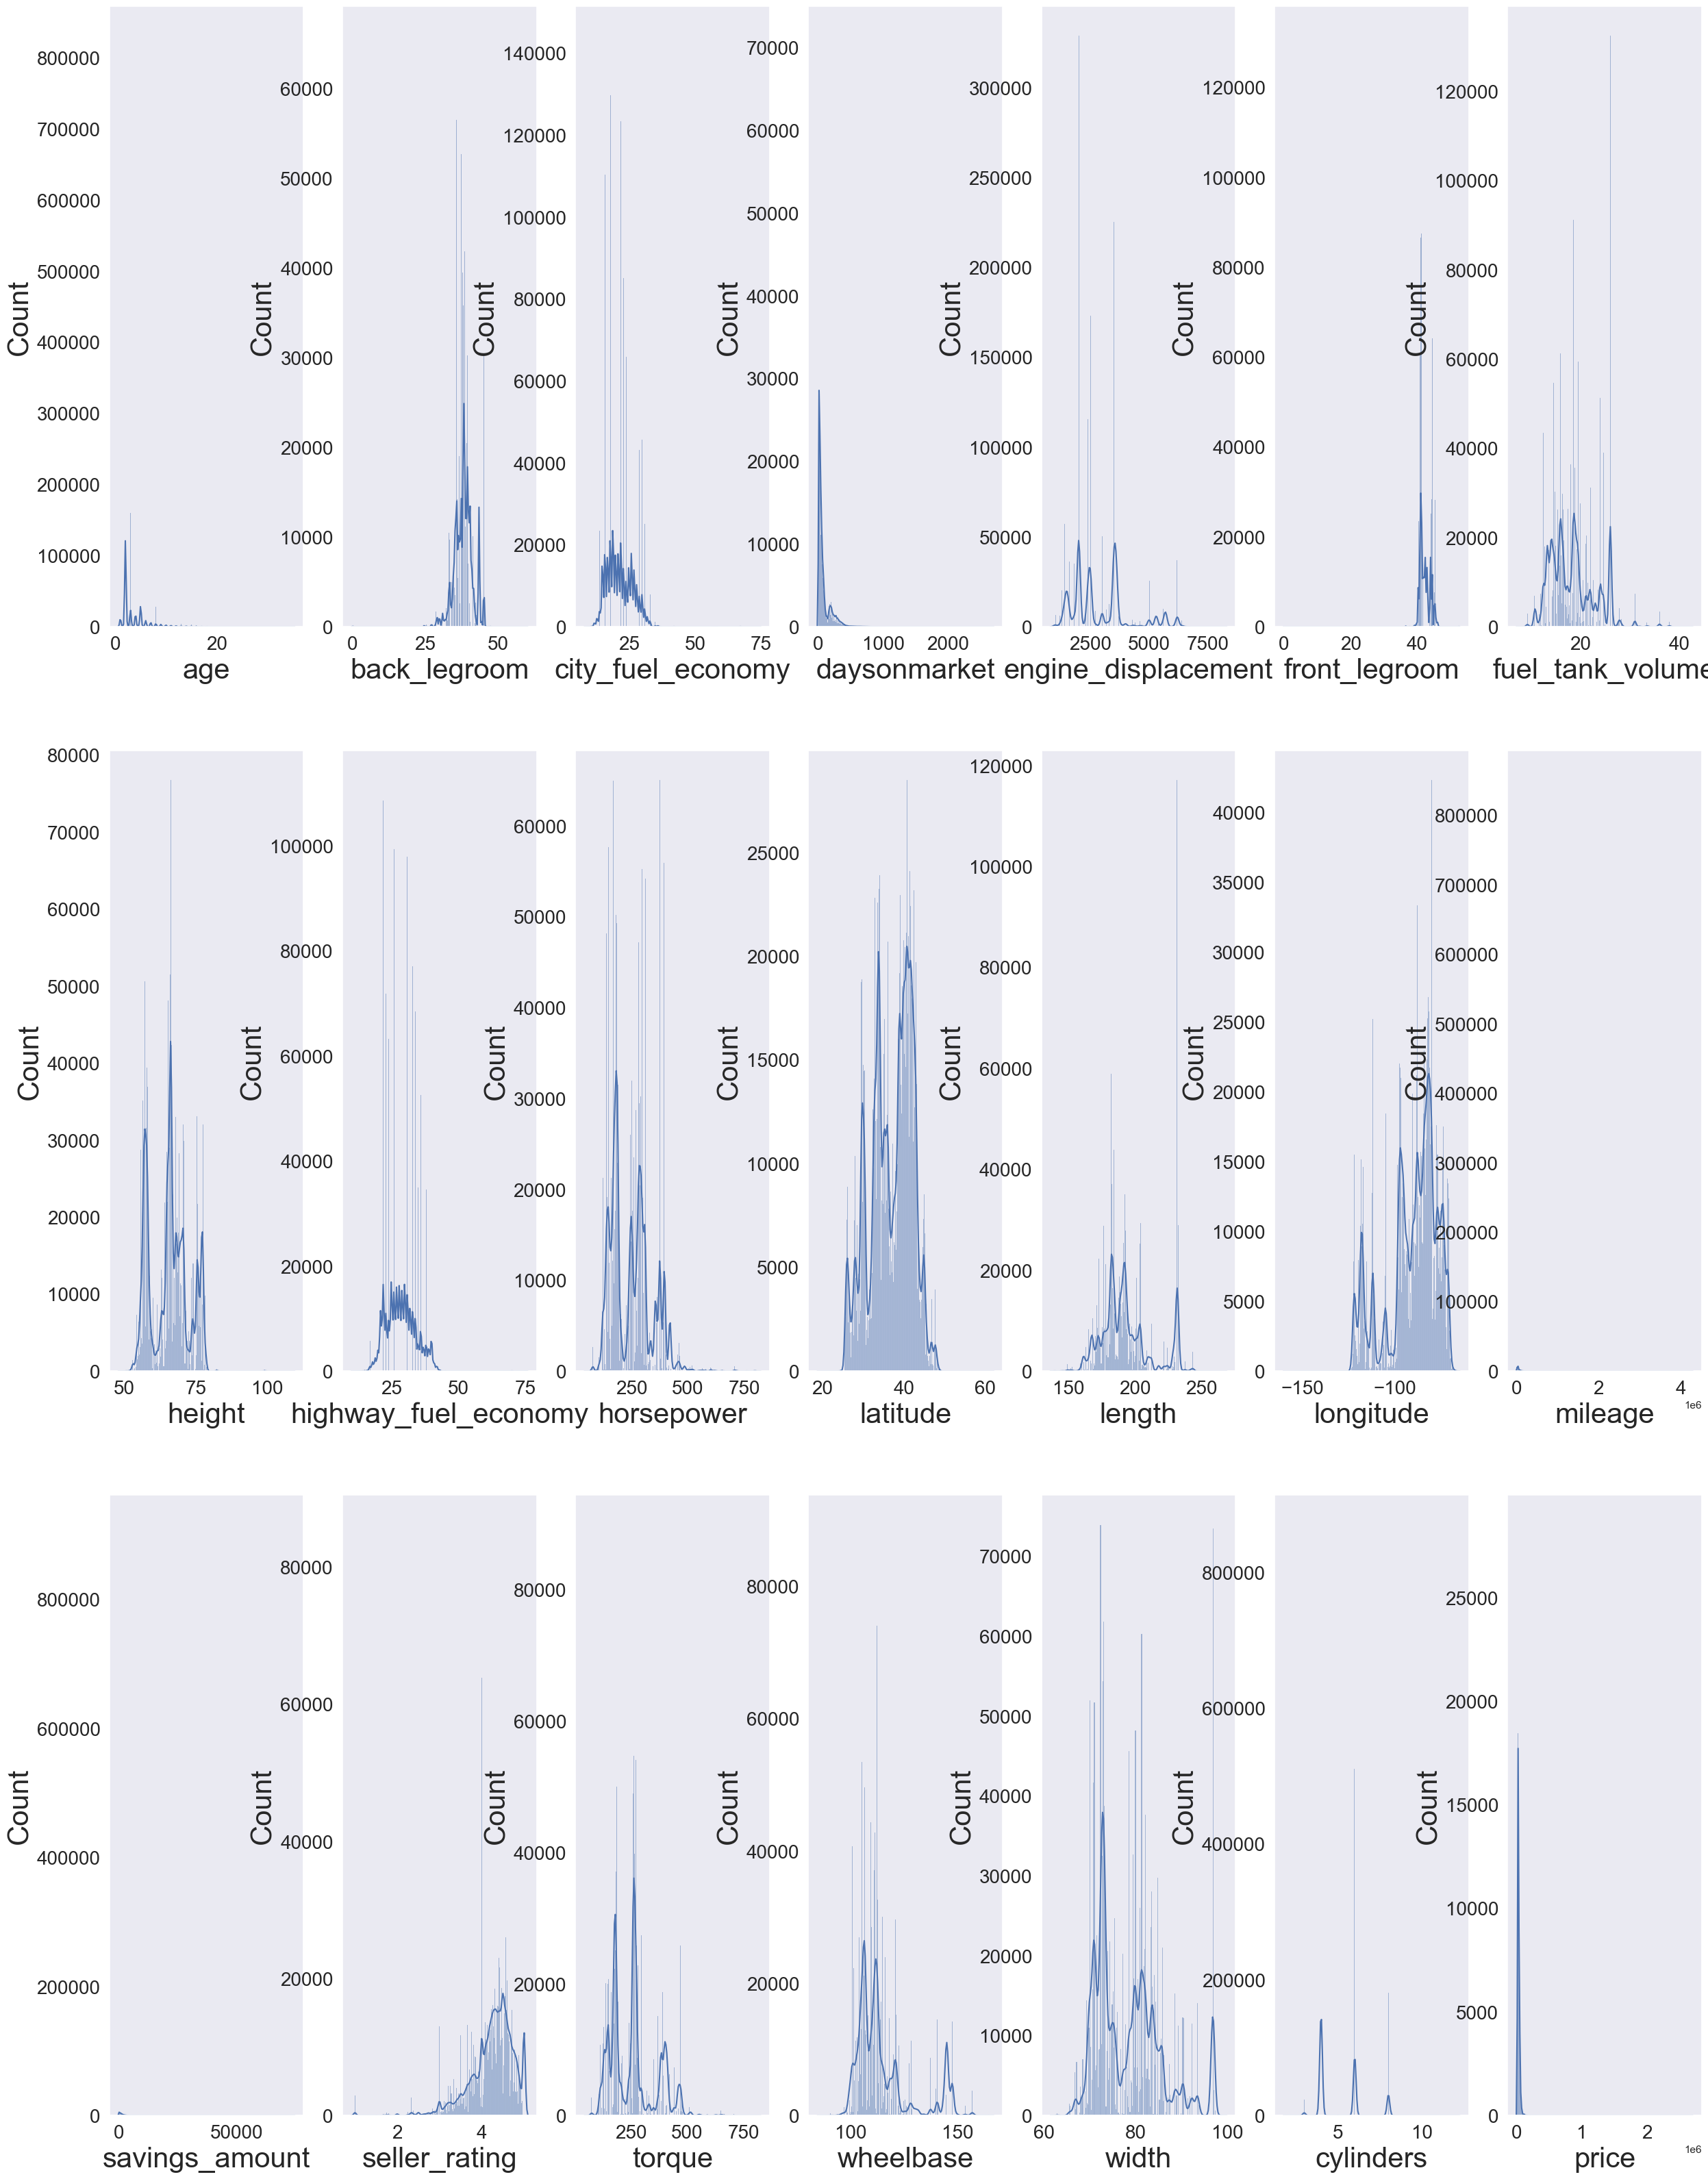

In [166]:
sns.set(style='dark',)

fig = plt.figure(figsize=(30,40))

i = 1

for column in df2.columns:
    plt.subplot(3,7,i)
    chart = sns.histplot(df2[column], kde = True, kde_kws=dict(cut=3))
    chart.set_xlabel(chart.get_xlabel(), fontsize = 30)
    chart.set_ylabel(chart.get_ylabel(), fontsize = 30)
    chart.tick_params(axis = 'both', which = 'major', labelsize = 20)
    
    i+=1

### Checking correlations between continuous variables

In [167]:
df2 = df2.drop('price', axis=1)

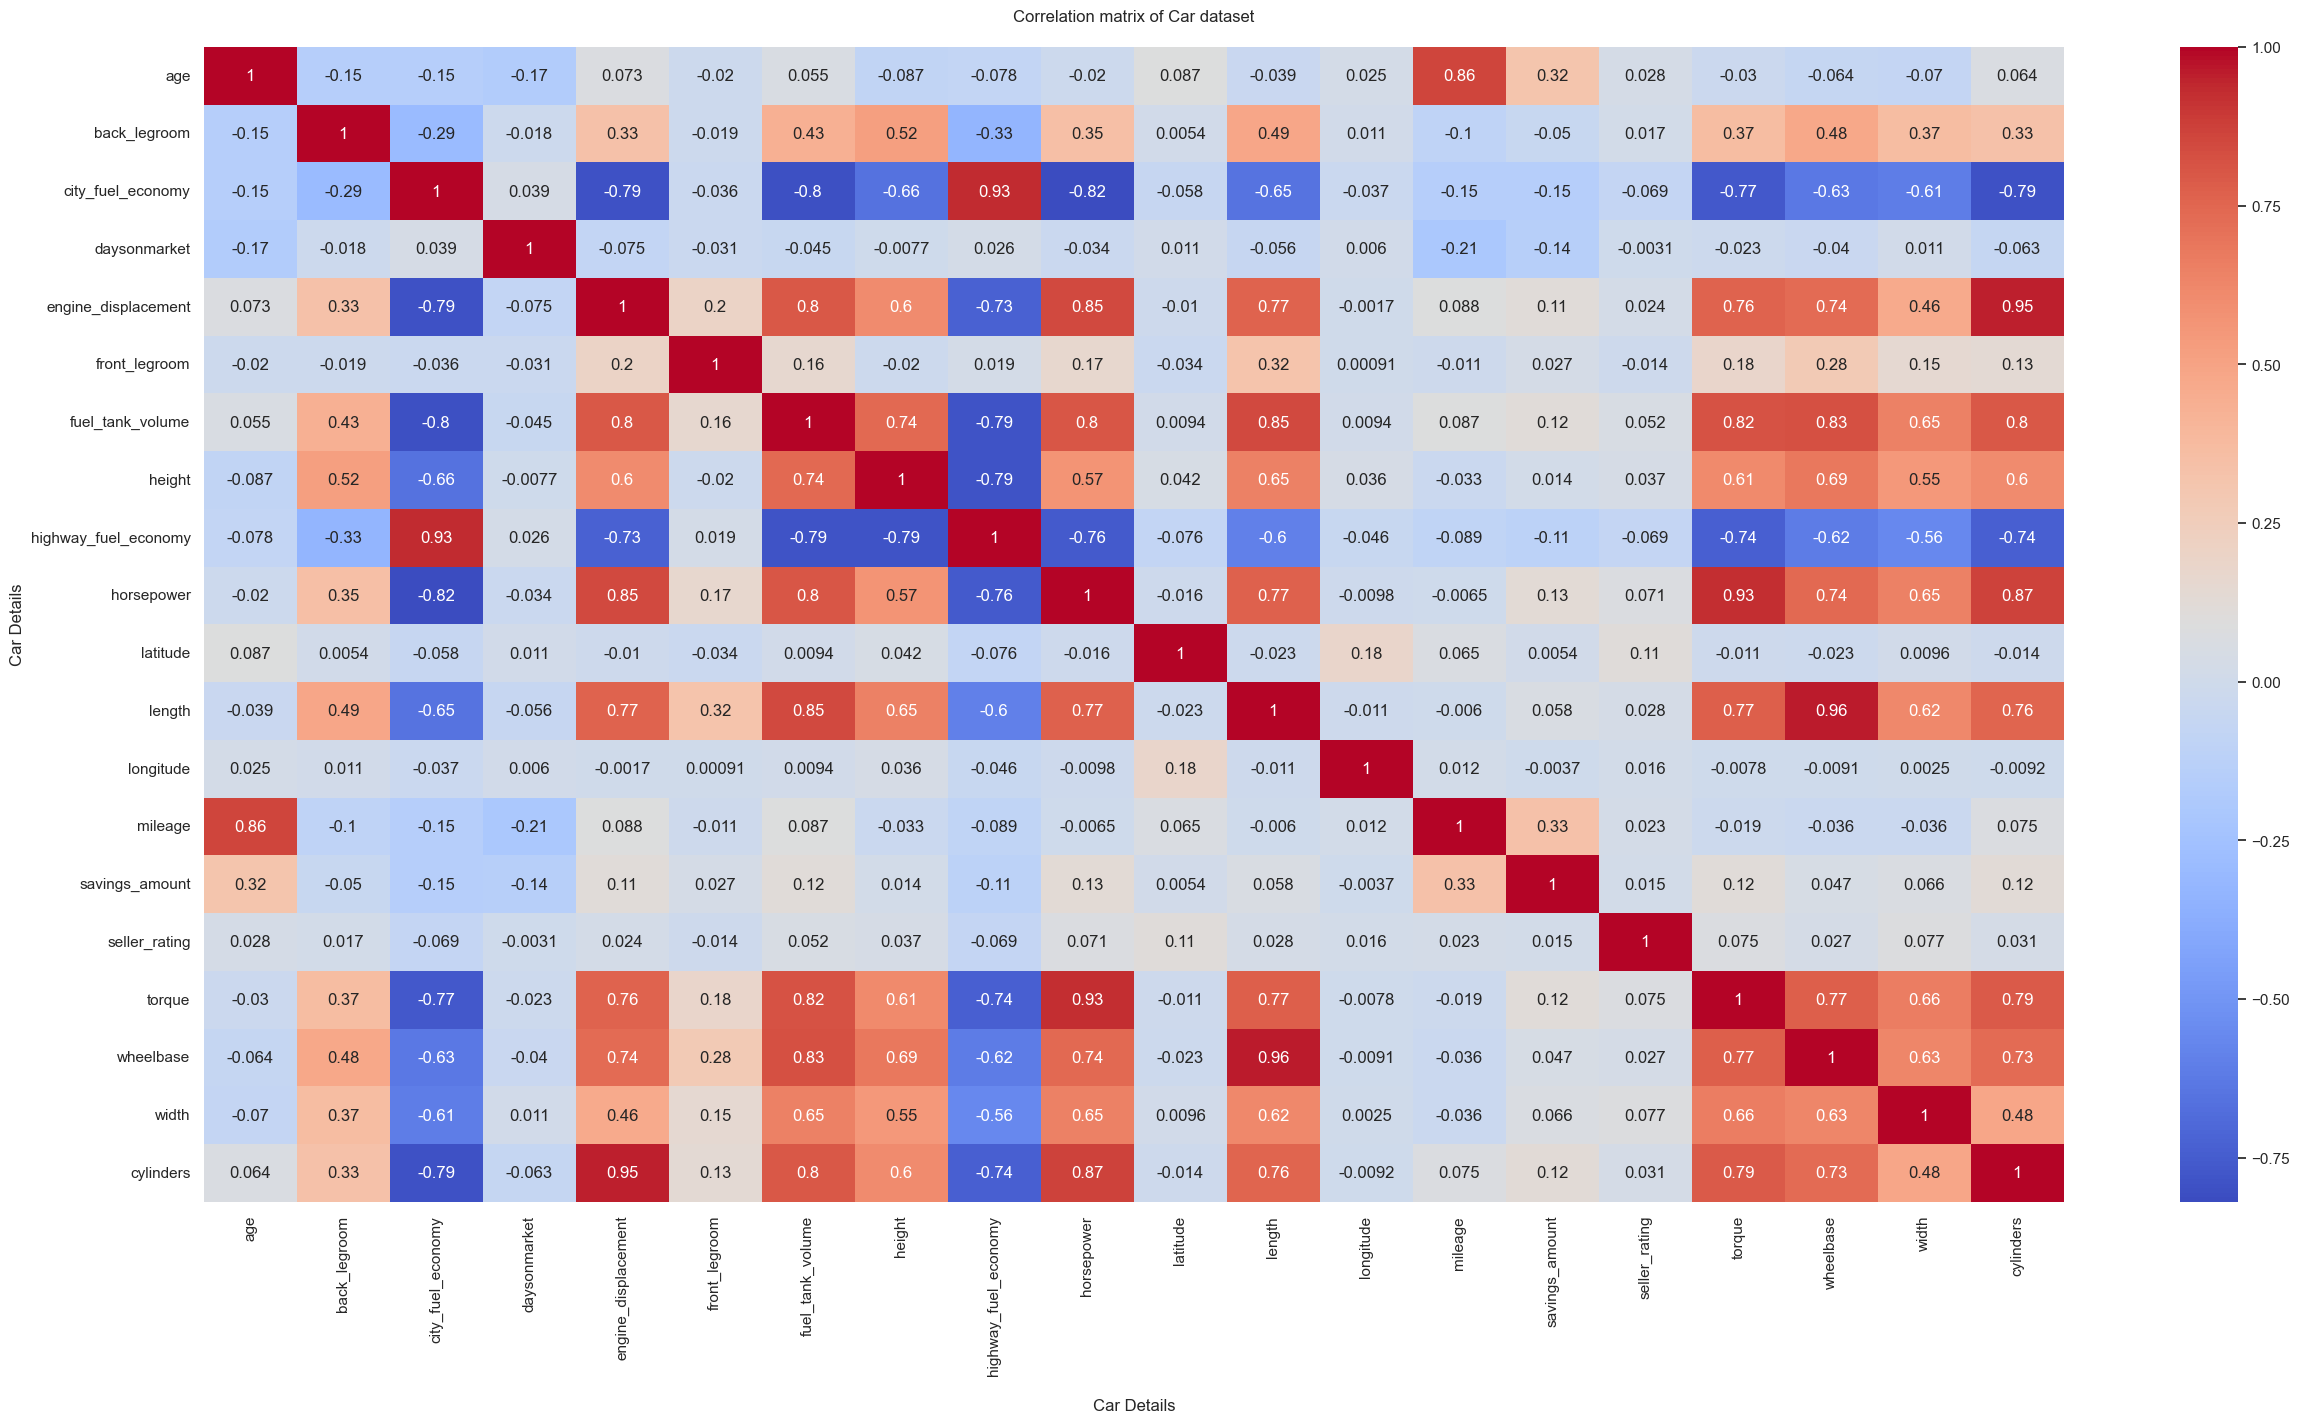

In [168]:
plt.figure(figsize=(30,15))
hm = sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")
hm.set(xlabel='\nCar Details', ylabel='Car Details', title = "Correlation matrix of Car dataset\n")
plt.show()

### Calculating the Variance Inflation Factor

In [169]:
df_vif = df2.dropna()

# df_vif # VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                   for i in range(len(df_vif.columns))]

vif_data.sort_values(by = "VIF", ascending = False)

,feature,VIF
11,length,2298.024070
17,wheelbase,1317.593386
5,front_legroom,647.394576
8,highway_fuel_economy,454.351373
7,height,421.537298
2,city_fuel_economy,355.734356
18,width,308.770100
1,back_legroom,244.280689
19,cylinders,182.294629
9,horsepower,133.955703


### Eliminating continuous variables with high correlation and VIF

In [62]:
numcols_drop = ['latitude', 'longitude', 'wheelbase', 'city_fuel_economy', 'highway_fuel_economy', 'front_legroom', 'height', 'width', 'back_legroom', 'length', 'engine_displacement', 'city_fuel_economy', 'torque', 'age', 'fuel_tank_volume', 'cylinders']
df2 = df2.drop(numcols_drop, axis = 1)


### Rechecking correlation and VIF for continuous variables

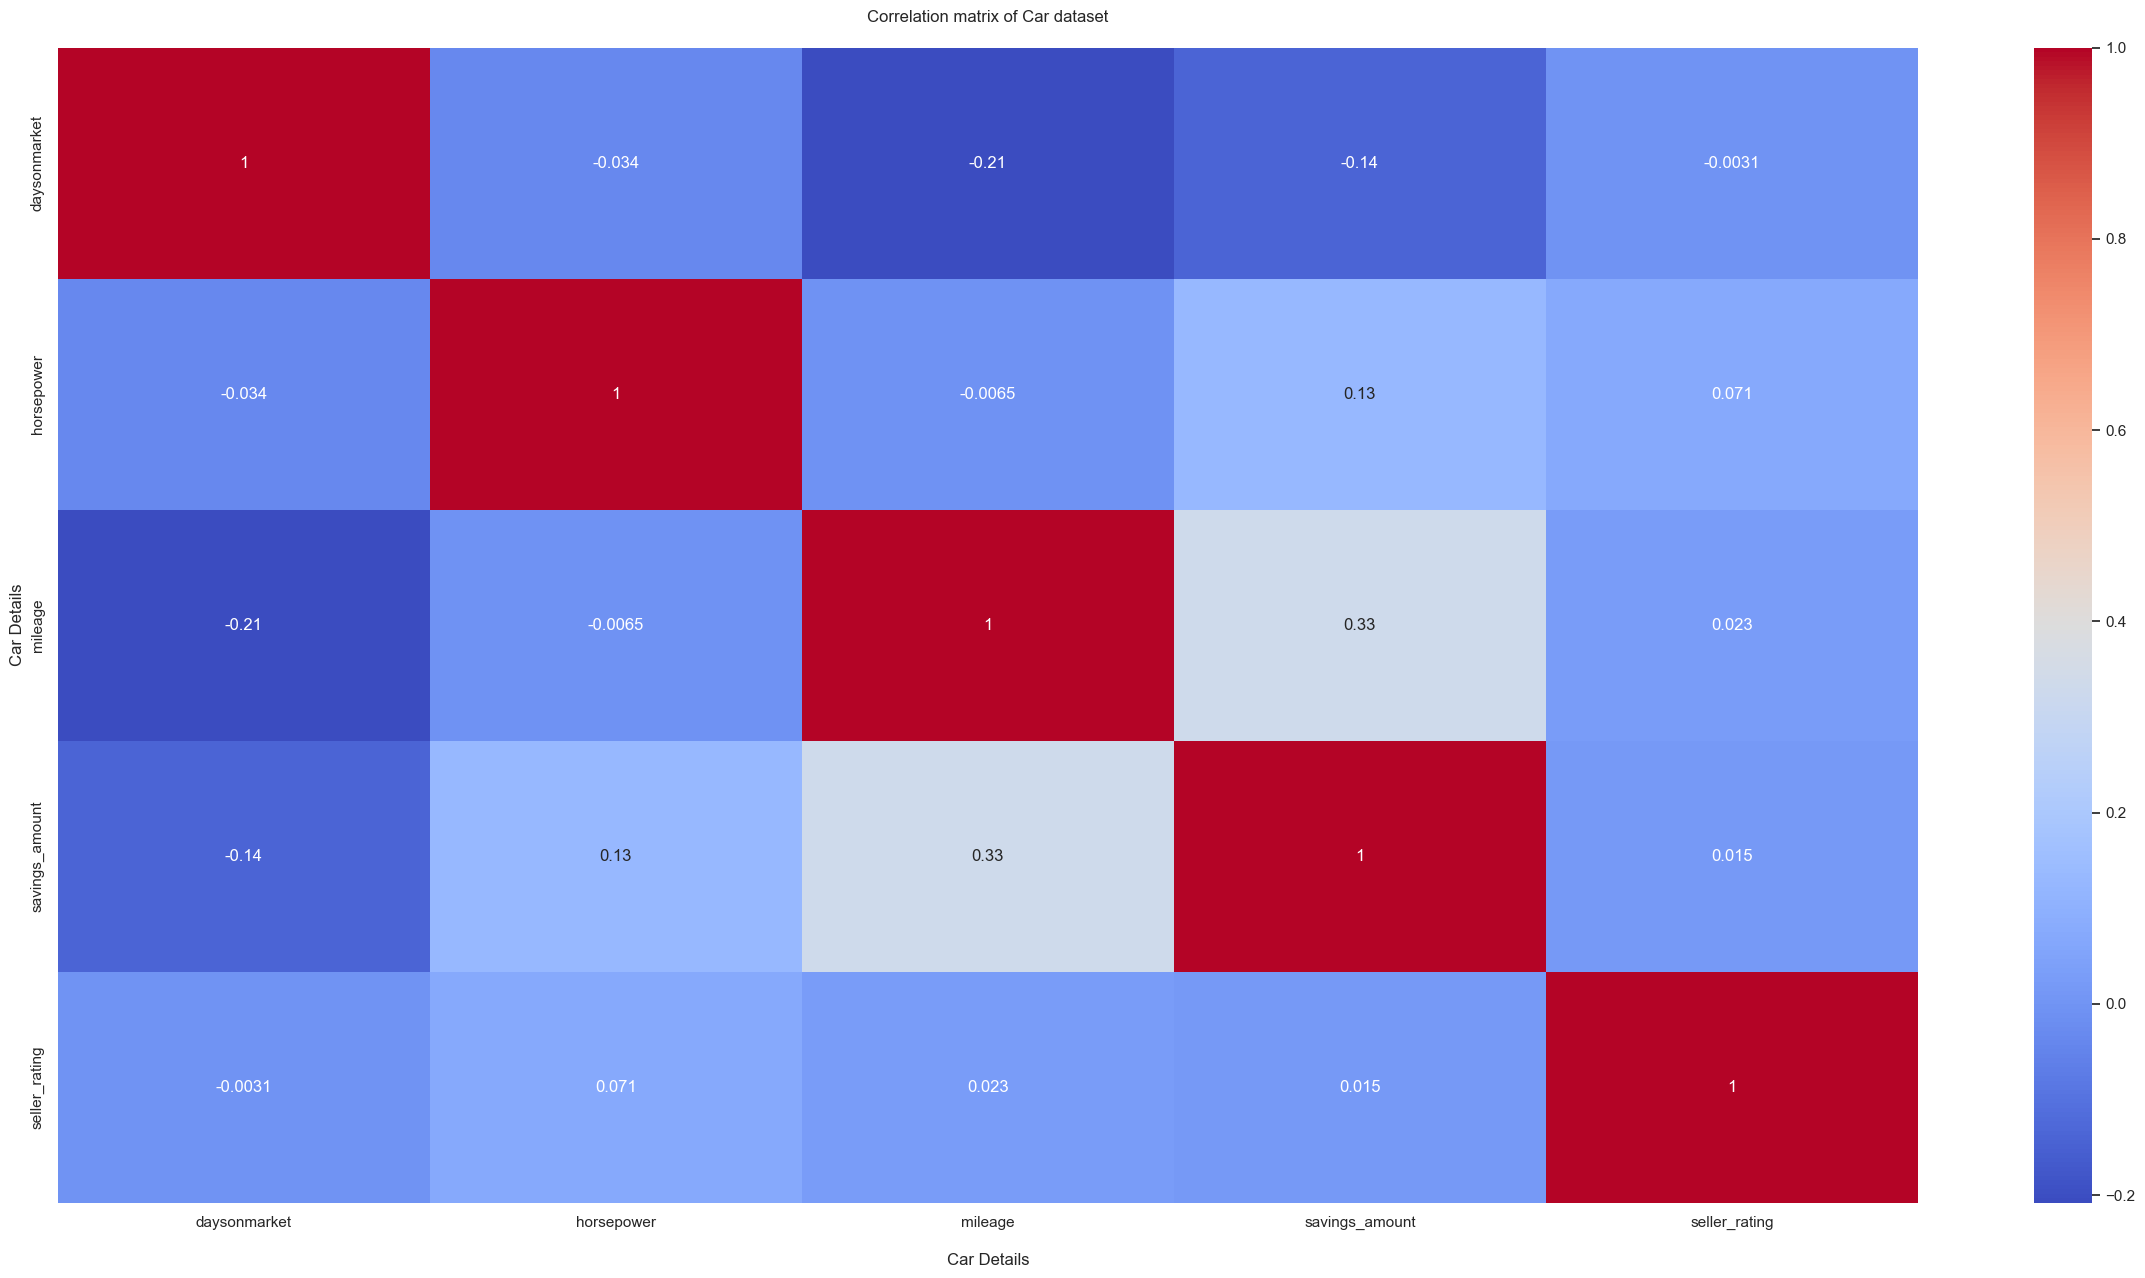

In [171]:
plt.figure(figsize=(30,15))
hm = sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")
hm.set(xlabel='\nCar Details', ylabel='Car Details', title = "Correlation matrix of Car dataset\n")
plt.show()

In [172]:
df_vif = df2.dropna()

# df_vif # VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                   for i in range(len(df_vif.columns))]

vif_data.sort_values(by = "VIF", ascending = False)

,feature,VIF
4,seller_rating,9.687992
1,horsepower,8.702608
0,daysonmarket,1.615675
2,mileage,1.592288
3,savings_amount,1.484851


### Dropping varibles (continuous & categorical) from cars based on correlation, VIF, and Cramer's V

In [63]:
catcols_drop = ['sp_name', 'trim_name', 'city', 'engine_cylinders', 'exterior_color', 'interior_color', 'franchise_make', 'model_name', 'transmission_display', 'power', 'wheel_system_display']


In [64]:
cars = cars.drop(numcols_drop, axis = 1)
cars = cars.drop(catcols_drop, axis =1)

## Final dataset check

In [41]:
# Final dataset shape
print(cars.shape)

(1586709, 18)


In [42]:
# Final columns retained
cars.columns

Index(['body_type', 'daysonmarket', 'engine_type', 'franchise_dealer',
       'fuel_type', 'has_accidents', 'horsepower', 'is_new', 'listing_color',
       'make_name', 'maximum_seating', 'mileage', 'savings_amount',
       'seller_rating', 'transmission', 'wheel_system', 'state', 'price'],
      dtype='object')

In [43]:
# Variables datatype
cars.dtypes

body_type           category
daysonmarket           int32
engine_type         category
franchise_dealer    category
fuel_type           category
has_accidents       category
horsepower           float64
is_new              category
listing_color       category
make_name           category
maximum_seating     category
mileage              float64
savings_amount         int32
seller_rating        float64
transmission        category
wheel_system        category
state               category
price                float64
dtype: object

In [44]:
# Null value check
cars.isnull().sum()

body_type           0
daysonmarket        0
engine_type         0
franchise_dealer    0
fuel_type           0
has_accidents       0
horsepower          0
is_new              0
listing_color       0
make_name           0
maximum_seating     0
mileage             0
savings_amount      0
seller_rating       0
transmission        0
wheel_system        0
state               0
price               0
dtype: int64

In [45]:
# Column unique values check
uniqueValues = cars.nunique()

print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
body_type                9
daysonmarket          1283
engine_type              5
franchise_dealer         1
fuel_type                6
has_accidents            1
horsepower             350
is_new                   2
listing_color           15
make_name               47
maximum_seating         11
mileage             138259
savings_amount        7774
seller_rating         1343
transmission             4
wheel_system             5
state                   51
price                74419
dtype: int64


### Price scatter plot

In [83]:
price_data = cars['price']
# import matplotlib.pyplot as plt

indexes = [i for i in range(len(price_data))]
sorted_price_data = list(np.sort(price_data))

In [75]:
len(price_data)

1586709

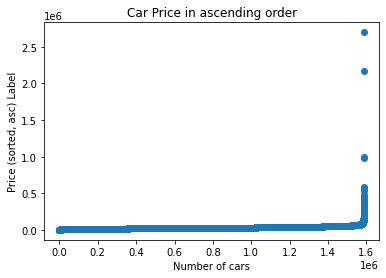

In [85]:
plt.scatter(indexes, sorted_price_data)

# Set the title and axis labels
plt.title("Car Price in ascending order")
plt.xlabel("Number of cars")
plt.ylabel("Price (sorted, asc) Label")

# Display the plot
plt.show()

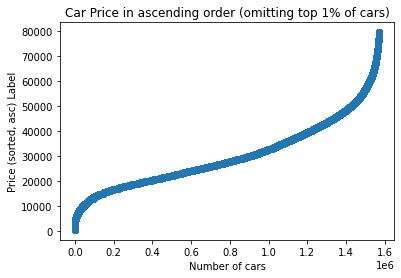

In [95]:
omit_outliers = int(0.99 * len(indexes)) +1

plt.scatter(indexes[:omit_outliers], sorted_price_data[:omit_outliers])

# Set the title and axis labels
plt.title("Car Price in ascending order (omitting top 1% of cars)")
plt.xlabel("Number of cars")
plt.ylabel("Price (sorted, asc) Label")

# Display the plot
plt.show()

Analysis:

Car prices, in ascending order are, seem mostly linear but with a sharp in price upturn for the top tier prices. 
So zooming in on the car prices for the bottom 99% (see second graph), we can tell prices follow a cubic graph shape. But with the majority (~100k mark to 1.4mil mark) of price points following a LINEAR graphical relationship.

Polynomial regression likely needed to model this relationship best. In addition, neural networks and Decision Trees will be good because they are non-linear.

Post-analysis edit:
From model tuning experiments, we are unable to run polynomial regression due to memory constraint issues. As such, we will stick with linear regression since the majority can be modelled by a MLR. 
To note, that by using Decision Trees, even though it is non-Linear, we can still have about 20% of the variation not explained (i.e. 1- R-sq), some variation in the Bias-Variance graph and an MAPE that is ~10%. The underfitting of an MLR model at the 2 extreme end of the price data is likely to contribute to these results. 




## Scaling the dataset

###  One-hot encoding for categorical variables

In [46]:
df3 = pd.DataFrame()

for column in cars.select_dtypes(include=['category', 'bool']):
    df3[column] = cars[column]
        
df3.head()

,body_type,engine_type,franchise_dealer,fuel_type,has_accidents,is_new,listing_color,make_name,maximum_seating,transmission,wheel_system,state
38,Sedan,I,True,Gasoline,Unknown,False,SILVER,Chevrolet,5 seats,A,FWD,New York
40,Coupe,V,True,Gasoline,Unknown,False,BLACK,Lexus,4 seats,A,AWD,New York
41,SUV / Crossover,V,True,Gasoline,Unknown,False,SILVER,Chevrolet,8 seats,A,FWD,New York
45,SUV / Crossover,V,True,Gasoline,Unknown,False,SILVER,Chevrolet,8 seats,A,AWD,New York
47,SUV / Crossover,V,True,Gasoline,Unknown,False,BLACK,Jeep,5 seats,A,4WD,New York


In [47]:
df5 = pd.get_dummies(df3, drop_first = True)

In [48]:
df5.head()

,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,engine_type_I,engine_type_R,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
38,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
40,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
print(list(df5.columns))

['body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon', 'engine_type_I', 'engine_type_R', 'engine_type_V', 'engine_type_W', 'fuel_type_Compressed Natural Gas', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'is_new_True', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN', 'listing_color_WHITE', 'listing_color_YELLOW', 'make_name_Alfa Romeo', 'make_name_Aston Martin', 'make_name_Audi', 'make_name_BMW', 'make_name_Bentley', 'make_name_Buick', 'make_name_Cadillac', 'make_name_Chevrolet', 'make_name_Chrysler', 'make_name_Dodge', 'make_name_FIAT', 'make_name_Ford', 'make_name_GMC', 'make_name_Genesis', 'make_na

In [50]:
print(cars['has_accidents'])

38         Unknown
40         Unknown
41         Unknown
45         Unknown
47         Unknown
            ...   
3000029    Unknown
3000031    Unknown
3000034    Unknown
3000036    Unknown
3000039    Unknown
Name: has_accidents, Length: 1586709, dtype: category
Categories (1, object): ['Unknown']


Note: has_accidents is not included in the final dataset as there is only one category 'Unknown' after pre-processing

### Concatenating categorical variables dataframe with continuous variables dataframe post one-hot encoding

In [183]:
df4 = pd.DataFrame()

for column in cars.select_dtypes(exclude=['category', 'bool']):
    df4[column] = cars[column]
        
df4.head()

,daysonmarket,horsepower,mileage,savings_amount,seller_rating,price
38,55,160.0,42394.0,1749,3.447761,14639.0
40,36,311.0,62251.0,1861,2.800000,32000.0
41,27,310.0,36410.0,3500,3.447761,23723.0
45,27,281.0,36055.0,2416,3.447761,22422.0
47,24,295.0,25745.0,2254,3.447761,29424.0


In [184]:
cars_coded = pd.concat([df5, df4], axis=1)

In [185]:
cars_coded.head()

,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,engine_type_I,engine_type_R,engine_type_V,engine_type_W,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,is_new_True,listing_color_BLUE,listing_color_BROWN,listing_color_GOLD,listing_color_GRAY,listing_color_GREEN,listing_color_ORANGE,listing_color_PINK,listing_color_PURPLE,listing_color_RED,listing_color_SILVER,listing_color_TEAL,listing_color_UNKNOWN,listing_color_WHITE,listing_color_YELLOW,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_BMW,make_name_Bentley,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Dodge,make_name_FIAT,make_name_Ford,make_name_GMC,make_name_Genesis,make_name_Honda,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kia,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_MINI,make_name_Maserati,make_name_Mazda,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Subaru,make_name_Suzuki,make_name_Toyota,make_name_Volkswagen,make_name_Volvo,maximum_seating_12 seats,maximum_seating_15 seats,maximum_seating_2 seats,maximum_seating_3 seats,maximum_seating_4 seats,maximum_seating_5 seats,maximum_seating_6 seats,maximum_seating_7 seats,maximum_seating_8 seats,maximum_seating_9 seats,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,daysonmarket,horsepower,mileage,savings_amount,seller_rating,price
38,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,160.0,42394.0,1749,3.447761,14639.0
40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,311.0,62251.0,1861,2.800000,32000.0
41,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,310.0,36410.0,3500,3.447761,23723.0
45,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,281.0,36055.0,2416,3.447761,22422.0
47,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,

In [186]:
cars_coded.to_csv('used_cars_data/cars_coded.csv', index=False)

### Splitting the dataset into train and test sets

In [187]:
cars_coded = pd.read_csv("used_cars_data/cars_coded.csv")

In [188]:
cars_array = cars_coded.to_numpy()

In [189]:
random_state = 2023
x =  cars_array[:, :-1]
y =  cars_array[:,-1]

x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.4, random_state=random_state)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=random_state)

# Validate size (as %) of sets
print("Train size: %.3f" % (x_train.shape[0]/ x.shape[0]))
print("Validation size: %.3f" % (x_val.shape[0]/ x.shape[0]))
print("Test size: %.3f" % (x_test.shape[0]/ x.shape[0]))


### Scaling the train and test sets using Robust and Standard Scaler

Robust and Standard scaling helps with eliminating the outliers, normalizing, and standardizing the datasets

In [190]:
def scaling(x, y):
    scale = preprocessing.RobustScaler()
    x_t1 = scale.fit_transform(x, y)
    
    scale = preprocessing.StandardScaler()
    x_t2 = scale.fit_transform(x_t1, y)
    
    return(x_t2)

In [191]:
x_train_scaled = scaling(x_train, y_train)
x_test_scaled = scaling(x_test, y_test)
x_val_scaled = scaling(x_val, y_val)